In [4]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

In [48]:
lower = pd.read_excel('03 AD+3CV+GS+DO_medium_down.xlsx', index_col=0)
CV4_6464 = pd.read_excel('01 AD+GS+DO_medium+4CV(32-64-64-128).xlsx', index_col=0)
CV4_128128 = pd.read_excel('02 01 AD+GS+DO_medium+4CV(32-64-128-128).xlsx', index_col=0).iloc[:50, :]

In [49]:
lower.head(3)

,loss,acc,val_loss,val_acc
0,3.596039,0.396685,2.627808,0.745301
1,27.346151,0.612714,29.248833,0.770729
2,114.021278,0.667468,88.799347,0.817161


In [50]:
CV4_6464.head(3)

,loss,acc,val_loss,val_acc
0,3.840464,0.213078,3.855001,0.477847
1,23.035538,0.416393,24.135080,0.644953
2,154.489059,0.496903,124.360405,0.691130


In [51]:
CV4_128128.head(3)

,loss,acc,val_loss,val_acc
0.0,1168621.000,0.870127,3392630.75,0.847776
1.0,1177070.375,0.873078,3309519.50,0.856876
2.0,1233999.625,0.872641,3728810.50,0.861213


In [52]:
print(lower.shape)
print(CV4_6464.shape)
print(CV4_128128.shape)

(50, 4)
(50, 4)
(50, 4)


### Plot accuracies

#### Create a df to plot loss values

In [61]:
# Initialize an empty df
final_acc = pd.DataFrame()

In [62]:
# List the columns the df will have
final_acc_columns = ['Train Acc Lower', 'Train Acc CV4_6464', 'Train Acc CV4_128128', 'Val Acc Lower', 'Val Acc CV4_6464', 'Val Acc CV4_128128']

In [63]:
# Create the columns
for column in final_acc_columns:
    final_acc[column] = None

In [64]:
# Confirm they were correctly created
final_acc

,Train Acc Lower,Train Acc CV4_6464,Train Acc CV4_128128,Val Acc Lower,Val Acc CV4_6464,Val Acc CV4_128128


In [65]:
# Add training accuracy values
final_acc['Train Acc Lower'] = lower['acc']
final_acc['Train Acc CV4_6464'] = CV4_6464['acc']
final_acc['Train Acc CV4_128128'] = CV4_128128['acc']

# Add val accuracy values
final_acc['Val Acc Lower'] = lower['val_acc']
final_acc['Val Acc CV4_6464'] = CV4_6464['val_acc']
final_acc['Val Acc CV4_128128'] = CV4_128128['acc']

In [66]:
final_acc.head(5)

,Train Acc Lower,Train Acc CV4_6464,Train Acc CV4_128128,Val Acc Lower,Val Acc CV4_6464,Val Acc CV4_128128
0,0.396685,0.213078,0.870127,0.745301,0.477847,0.870127
1,0.612714,0.416393,0.873078,0.770729,0.644953,0.873078
2,0.667468,0.496903,0.872641,0.817161,0.691130,0.872641
3,0.700291,0.564335,0.871475,0.821754,0.728123,0.871475
4,0.724481,0.602805,0.875301,0.806106,0.747257,0.875301


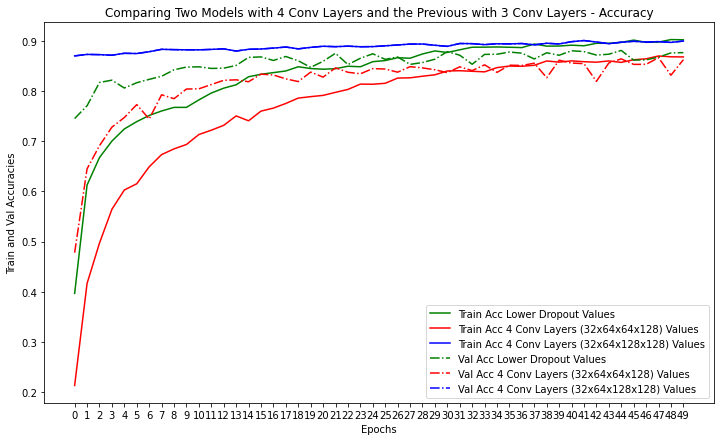

In [83]:
# define area
plt.figure(figsize=(12, 7))

# define x axis
x = final_acc.index
  
# plot lines
plt.plot(x, final_acc['Train Acc Lower'], label = "Train Acc Lower Dropout Values", color='green')
plt.plot(x, final_acc['Train Acc CV4_6464'], label = "Train Acc 4 Conv Layers (32x64x64x128) Values", color='red')
plt.plot(x, final_acc['Train Acc CV4_128128'], label = "Train Acc 4 Conv Layers (32x64x128x128) Values", color='blue')
plt.plot(x, final_acc['Val Acc Lower'], label = "Val Acc Lower Dropout Values", color='green', linestyle='-.')
plt.plot(x, final_acc['Val Acc CV4_6464'], label = "Val Acc 4 Conv Layers (32x64x64x128) Values", color='red', linestyle='-.')
plt.plot(x, final_acc['Val Acc CV4_128128'], label = "Val Acc 4 Conv Layers (32x64x128x128) Values", color='blue', linestyle='-.')
plt.xticks(np.arange(0, 50, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Accuracies")
plt.title("Comparing Two Models with 4 Conv Layers and the Previous with 3 Conv Layers - Accuracy")
plt.show()

### Plot loss values

#### Create a df to plot loss values

In [74]:
# Initialize an empty df
final_loss = pd.DataFrame()

In [75]:
# List the columns the df will have
final_loss_columns = ['Train Loss Lower', 'Train Loss CV4_6464', 'Train Loss CV4_128128', 'Val Loss Lower', 'Val Loss CV4_6464', 'Val Loss CV4_128128']

In [76]:
# Create the columns
for column in final_loss_columns:
    final_loss[column] = None

In [77]:
# Confirm they were correctly created
final_loss

,Train Loss Lower,Train Loss CV4_6464,Train Loss CV4_128128,Val Loss Lower,Val Loss CV4_6464,Val Loss CV4_128128


In [78]:
# Add training accuracy values
final_loss['Train Loss Lower'] = lower['loss']
final_loss['Train Loss CV4_6464'] = CV4_6464['loss']
final_loss['Train Loss CV4_128128'] = CV4_128128['loss']

# Add val accuracy values
final_loss['Val Loss Lower'] = lower['val_loss']
final_loss['Val Loss CV4_6464'] = CV4_6464['val_loss']
final_loss['Val Loss CV4_128128'] = CV4_128128['val_loss']

In [79]:
final_loss.head(5)

,Train Loss Lower,Train Loss CV4_6464,Train Loss CV4_128128,Val Loss Lower,Val Loss CV4_6464,Val Loss CV4_128128
0,3.596039,3.840464,1168621.000,2.627808,3.855001,3392630.75
1,27.346151,23.035538,1177070.375,29.248833,24.135080,3309519.50
2,114.021278,154.489059,1233999.625,88.799347,124.360405,3728810.50
3,319.421387,509.145020,1235190.250,239.794388,441.412567,4275770.00
4,629.885010,1323.348633,1312736.500,576.906555,1183.311890,4061277.75


#### Plot

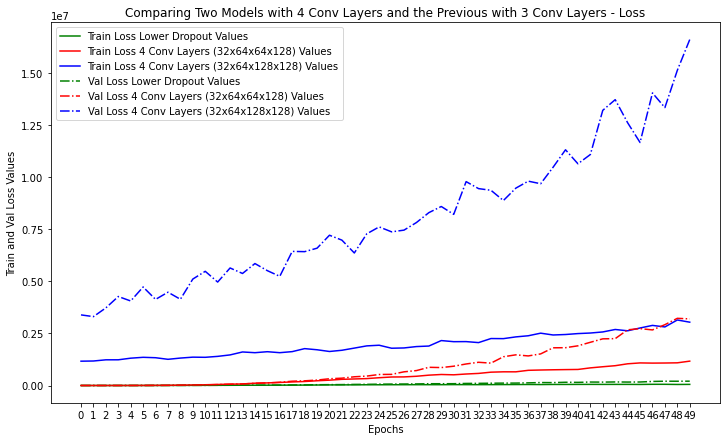

In [84]:
# define area
plt.figure(figsize=(12, 7))

# define x axis
x = final_loss.index
  
# plot lines
plt.plot(x, final_loss['Train Loss Lower'], label = "Train Loss Lower Dropout Values", color='green')
plt.plot(x, final_loss['Train Loss CV4_6464'], label = "Train Loss 4 Conv Layers (32x64x64x128) Values", color='red')
plt.plot(x, final_loss['Train Loss CV4_128128'], label = "Train Loss 4 Conv Layers (32x64x128x128) Values", color='blue')
plt.plot(x, final_loss['Val Loss Lower'], label = "Val Loss Lower Dropout Values", color='green', linestyle='-.')
plt.plot(x, final_loss['Val Loss CV4_6464'], label = "Val Loss 4 Conv Layers (32x64x64x128) Values", color='red', linestyle='-.')
plt.plot(x, final_loss['Val Loss CV4_128128'], label = "Val Loss 4 Conv Layers (32x64x128x128) Values", color='blue', linestyle='-.')
plt.xticks(np.arange(0, 50, 1))
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Train and Val Loss Values")
plt.title("Comparing Two Models with 4 Conv Layers and the Previous with 3 Conv Layers - Loss")
plt.show()